In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [3]:
uploaded_file = files.upload()

Saving studentRegistration.csv to studentRegistration.csv


In [6]:
studentRegistration = list(uploaded_file.keys())[0]
df = pd.read_csv(studentRegistration)

In [7]:
# Tampilkan informasi dasar tentang data
print(df.info())

# Statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.00

<ipython-input-8-539e63b0be4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


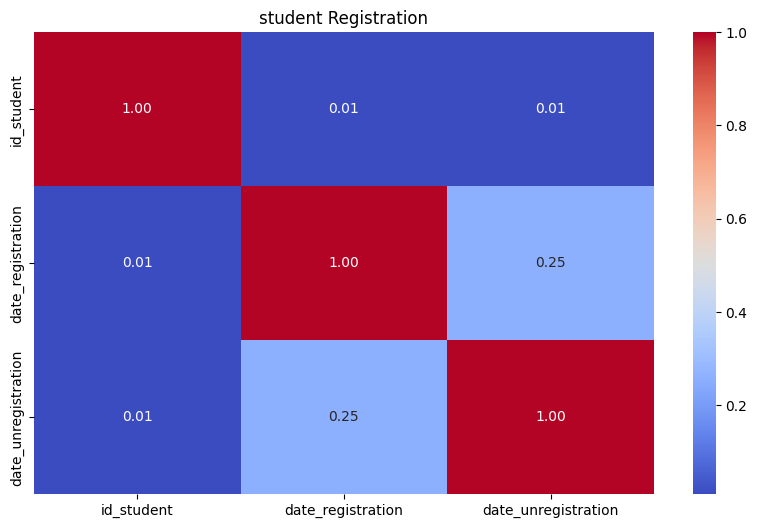

In [8]:
# Korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('student Registration')
plt.show()


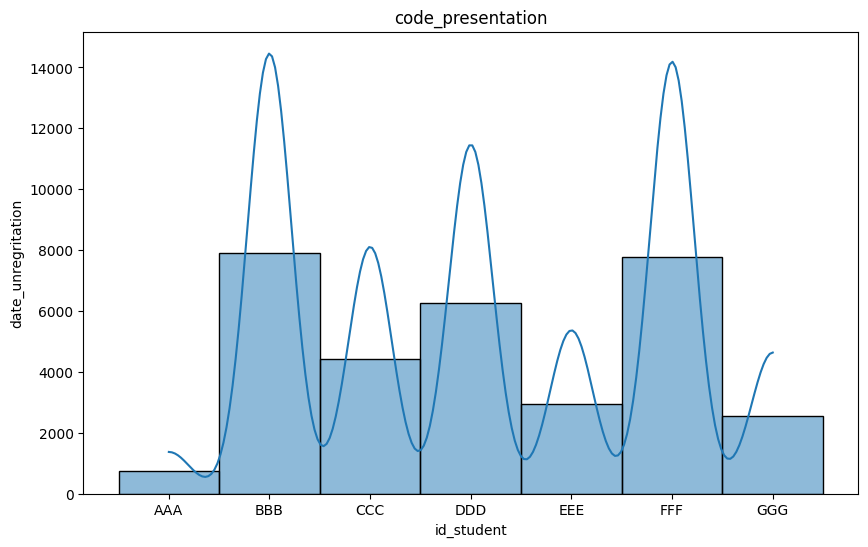

In [10]:
# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df['code_module'], bins=20, kde=True)
plt.title('code_presentation')
plt.xlabel('id_student')
plt.ylabel('date_unregritation')
plt.show()


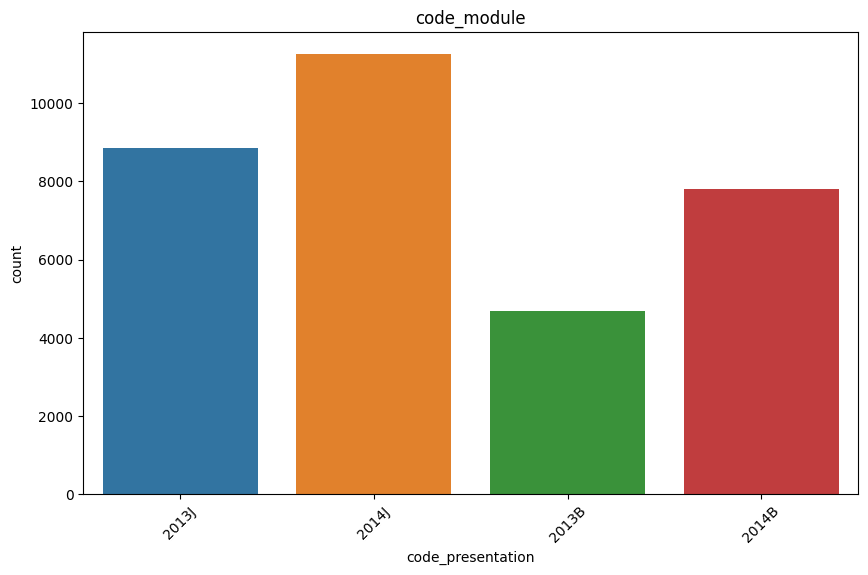

In [11]:
# Visualisasi data kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='code_presentation', data=df)
plt.title('code_module')
plt.xticks(rotation=45)
plt.show()


In [12]:
df['date_unregistration'].fillna(df['date_unregistration'].mean(), inplace=True)
df['date_unregistration'].fillna(df['date_unregistration'].mode()[0], inplace=True)
label_encoder = LabelEncoder()
df['date_unregistration'] = label_encoder.fit_transform(df['date_unregistration'])
scaler = StandardScaler()
df[['date_unregistration', 'date_registration']] = scaler.fit_transform(df[['date_unregistration', 'date_registration']])
X = df.drop('date_unregistration', axis=1)  # Fitur
y = df['date_registration']  # Target

In [13]:
# Menampilkan 5 baris pertama data setelah preprocessing
print(df.head())

# Menampilkan informasi dasar tentang data setelah preprocessing
print(df.info())

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391          -1.818699   
1         AAA             2013J       28400           0.333158   
2         AAA             2013J       30268          -0.458563   
3         AAA             2013J       31604           0.353459   
4         AAA             2013J       32885          -2.163809   

   date_unregistration  
0            -0.006733  
1            -0.006733  
2            -0.849490  
3            -0.006733  
4            -0.006733  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  32593 non-null  flo